Step by step sentiment analysis text classifier in python

# Data preprocessing
- As we are dealing with the text data, we need to preprocess it using word embeddings.

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("Tweets.csv")

In [25]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [26]:
review_df = df[['text','airline_sentiment']]

In [27]:
review_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [28]:
review_df = review_df[review_df['airline_sentiment'] !='neutral']

In [29]:
review_df

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative


In [30]:
review_df['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [31]:
sentiment_label = review_df.airline_sentiment.factorize()

In [32]:
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [33]:
tweet = review_df.text.values

In [34]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000)

In [36]:
tokenizer.fit_on_texts(tweet)

In [37]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [49]:
vocab_size = len(tokenizer.word_index) + 1

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [40]:
encoded_docs

[[103, 575, 530, 1287, 2416, 1, 2, 177],
 [103, 88, 124, 3255, 1, 4076, 4077, 957, 15, 20, 4078, 58, 56, 25, 482, 2417],
 [103, 9, 88, 4, 124, 439, 196, 483, 86, 21],
 [103,
  388,
  83,
  281,
  219,
  4,
  8,
  7,
  205,
  28,
  198,
  25,
  29,
  2167,
  88,
  124,
  2,
  122,
  196,
  483,
  86,
  151,
  1977],
 [103, 184, 1348, 297, 49, 3, 114, 2418, 29, 1978, 150, 450],
 [103, 233, 3, 35, 3, 54, 1225],
 [103, 21, 22, 337, 9, 521, 40, 77, 347, 231, 174, 138, 1, 19],
 [103, 3, 710, 97, 650, 44, 172, 203, 154, 1225],
 [103,
  29,
  14,
  543,
  4,
  110,
  669,
  226,
  1603,
  86,
  11,
  636,
  207,
  1,
  58,
  3,
  365,
  126,
  864,
  10,
  11,
  406,
  207,
  252,
  1705],
 [103,
  60,
  151,
  20,
  1825,
  1510,
  96,
  112,
  160,
  62,
  2,
  1706,
  450,
  39,
  197,
  53,
  47,
  50],
 [103, 34],
 [103, 317, 1511, 958, 14, 66, 711],
 [103,
  44,
  879,
  7,
  11,
  166,
  1288,
  844,
  8,
  291,
  1,
  682,
  118,
  552,
  229,
  31,
  110,
  494,
  86,
  1103,
  1422],

# Build the text classifier

In [41]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [50]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
________________________________________________

# Train the sentiment analysis model

In [52]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 214s 648ms/step - loss: 0.3967 - accuracy: 0.8376 - val_loss: 0.2265 - val_accuracy: 0.9043
Epoch 2/5
289/289 [==============================] - 163s 565ms/step - loss: 0.2227 - accuracy: 0.9162 - val_loss: 0.1618 - val_accuracy: 0.9407
Epoch 3/5
289/289 [==============================] - 216s 747ms/step - loss: 0.1672 - accuracy: 0.9381 - val_loss: 0.1740 - val_accuracy: 0.9424
Epoch 4/5
289/289 [==============================] - 216s 749ms/step - loss: 0.1380 - accuracy: 0.9476 - val_loss: 0.1618 - val_accuracy: 0.9446
Epoch 5/5
289/289 [==============================] - 184s 636ms/step - loss: 0.1128 - accuracy: 0.9587 - val_loss: 0.1883 - val_accuracy: 0.9441


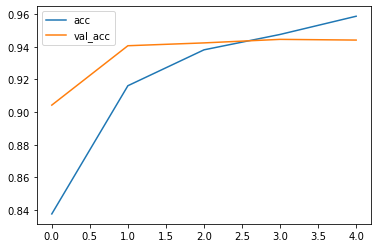

<Figure size 432x288 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

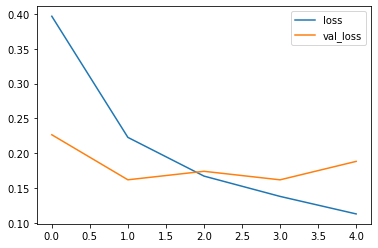

<Figure size 432x288 with 0 Axes>

In [54]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")